In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Timely data of warnings based on hours

## First we will see overal data using heat map.

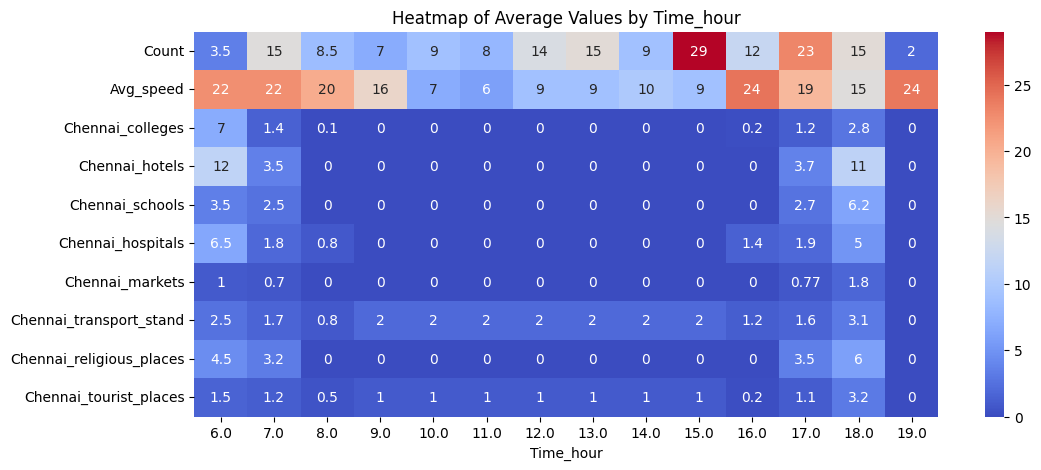

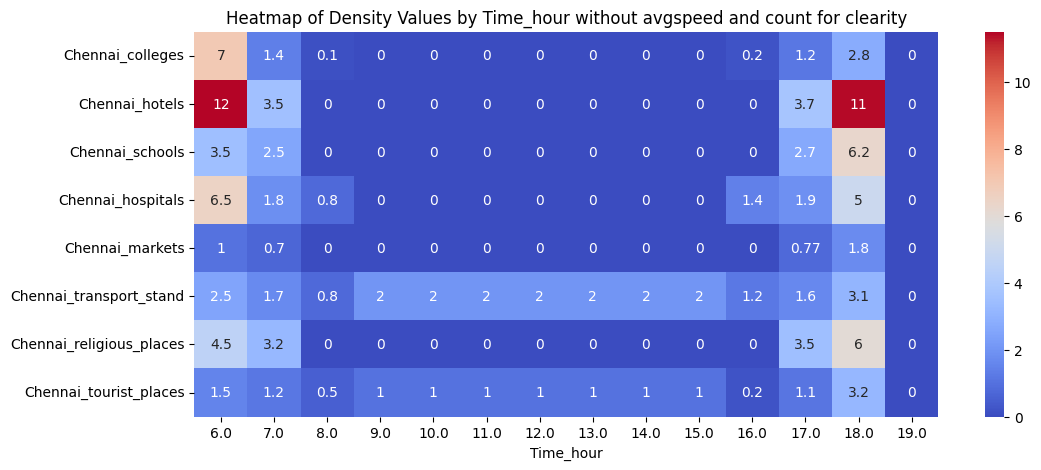

In [2]:

df = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\Time basis\alert concenteration hourly with places count\cas_pcw.csv")
df = df.drop(["Lat", "Long"], axis=1)
grouped_df = df.groupby('Time_hour').mean()
grouped_df = grouped_df.T
plt.figure(figsize=(12, 5))
sns.heatmap(grouped_df, annot=True, cmap="coolwarm")
plt.title("Heatmap of Average Values by Time_hour")
plt.show()


grouped_df = grouped_df.drop(["Count", "Avg_speed"], axis=0)
plt.figure(figsize=(12, 5))
sns.heatmap(grouped_df, annot=True, cmap="coolwarm")
plt.title("Heatmap of Density Values by Time_hour without avgspeed and count for clearity")
plt.show()


## Now we will see contribution of places in each hours in warning.

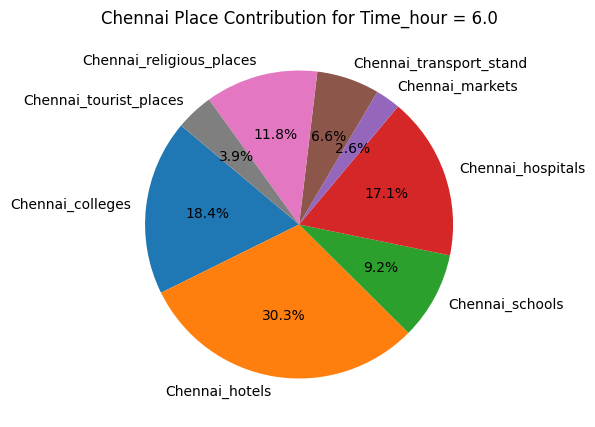

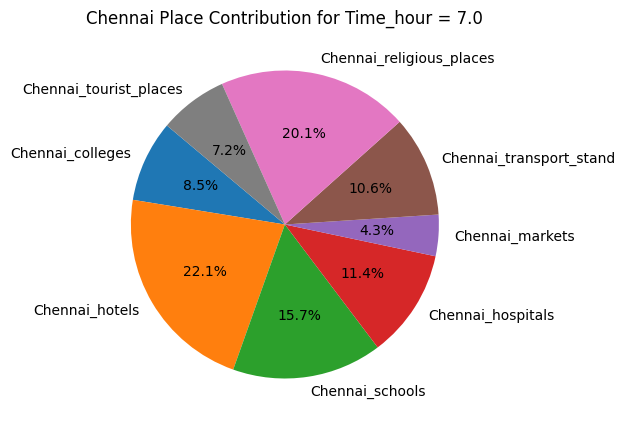

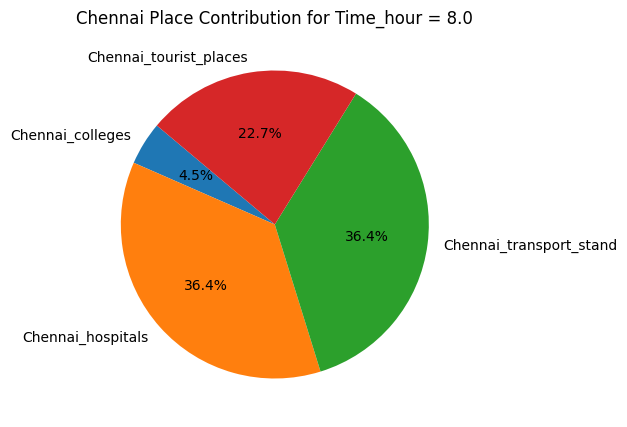

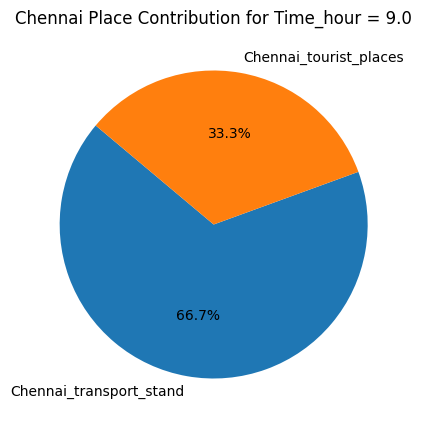

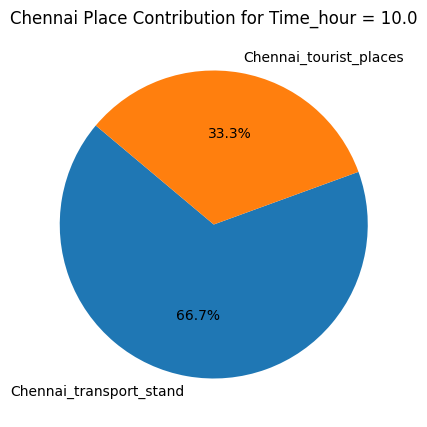

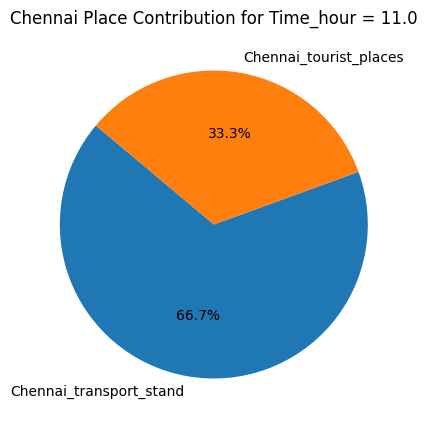

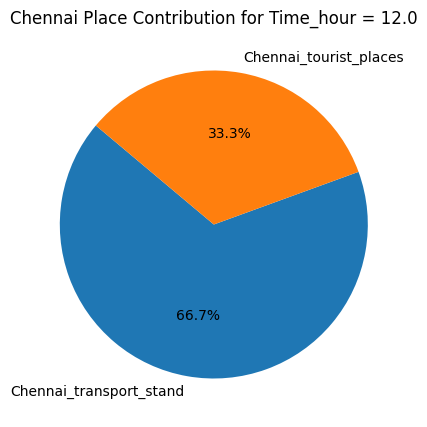

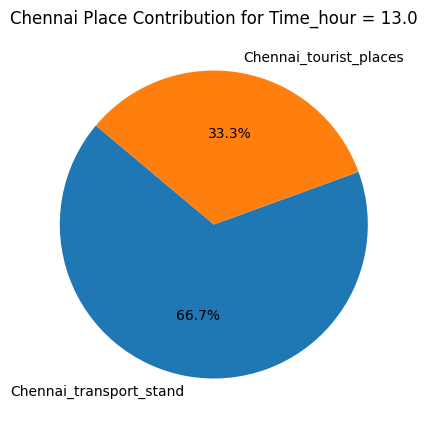

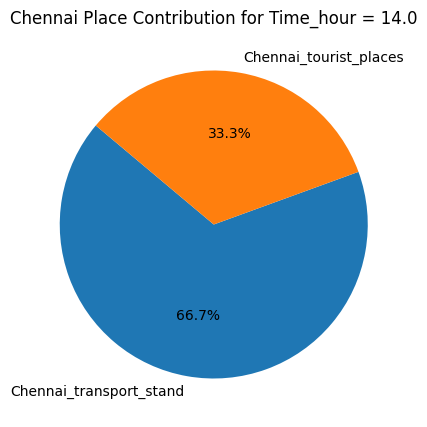

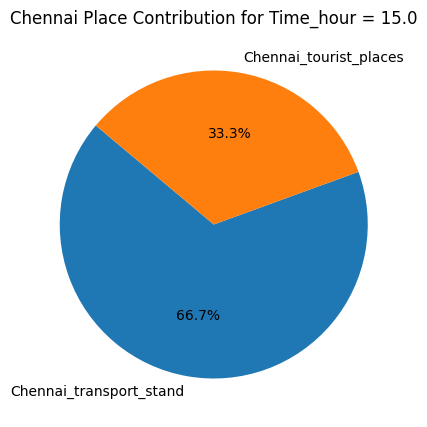

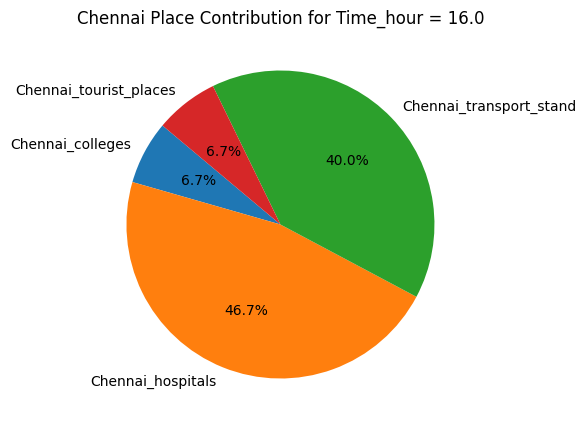

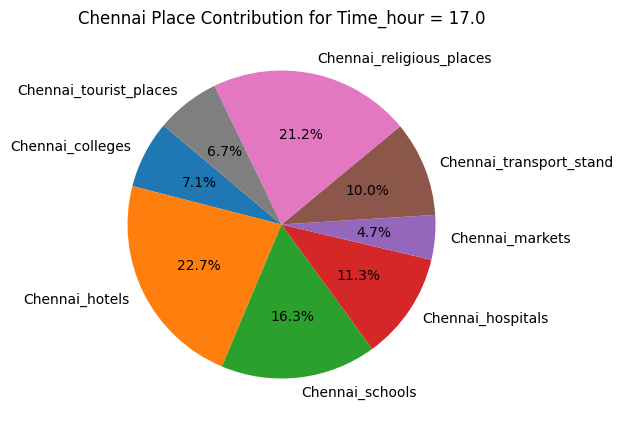

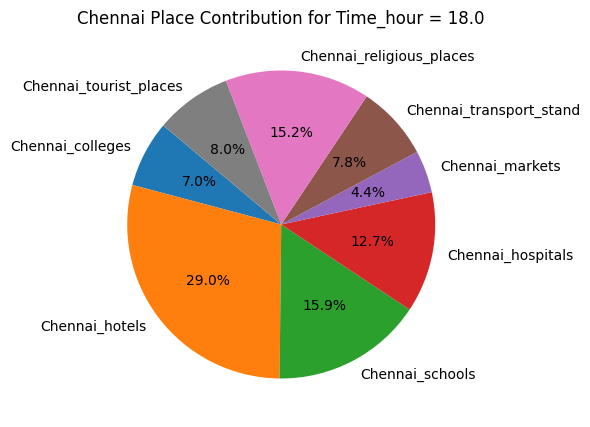

In [3]:
#this is data of locations where concenteration of alert is high.
df = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\Time basis\alert concenteration hourly with places count\cas_pcw.csv")
df = df.drop(["Lat", "Long", "Count", "Avg_speed"], axis=1)
grouped_df = df.groupby('Time_hour').sum()
grouped_df['Total'] = grouped_df.sum(axis=1)
for time_hour, row in grouped_df.iterrows():
    chennai_places = row[:-1] 
    total = row["Total"]
    percentages = (chennai_places / total) * 100
    
    if any(percentages > 0):
        labels = [place for place, percentage in percentages.items() if percentage > 0]
        percentages = [percentage for percentage in percentages if percentage > 0]
        
        # Create a pie chart
        plt.figure(figsize=(5, 5))
        plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f"Chennai Place Contribution for Time_hour = {time_hour}")
        plt.show()


# Weekday seperated data of warnings for pcw

In [4]:
df=pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\date basis\alert seperated data with weekday\cas_pcw.csv")
df=df[df["Weekday"]=="Sunday"]
print(df)

        Alert        Date      Time        Lat       Long  Vehicle  Speed  \
1477  cas_pcw  2022-08-14  07:35:06  13.074083  80.261996     5339     31   
1478  cas_pcw  2022-08-14  07:46:30  13.094796  80.292350     5339     18   
1479  cas_pcw  2022-08-14  07:49:26  13.087822  80.290045     5339     23   
1480  cas_pcw  2022-08-14  11:44:40  13.031620  80.277607     5339     28   
1481  cas_pcw  2022-08-14  12:42:32  12.907384  80.097322     5339     13   
1482  cas_pcw  2022-08-14  12:42:38  12.907384  80.097322     5339     13   

     Weekday  
1477  Sunday  
1478  Sunday  
1479  Sunday  
1480  Sunday  
1481  Sunday  
1482  Sunday  


This indicates only 5339 bus runs on sunday and a single day only.

##  percent contribution of places on sunday.

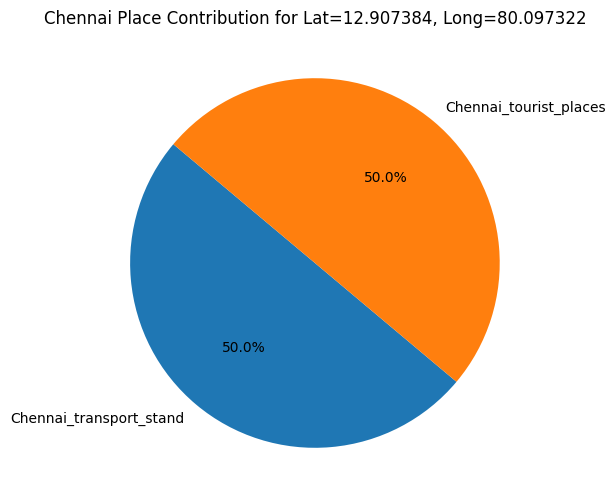

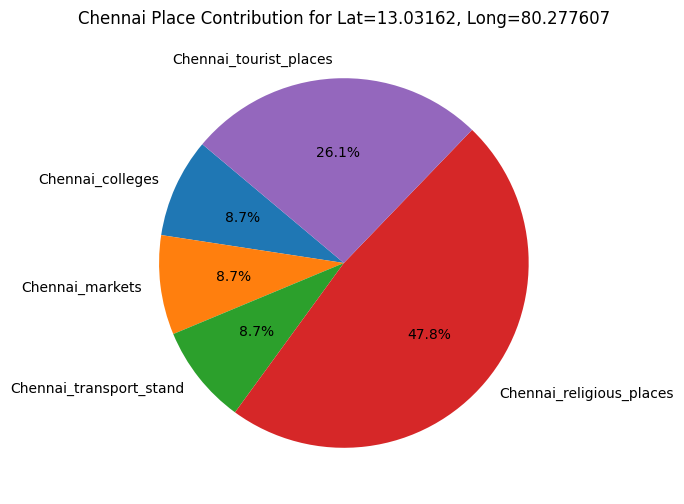

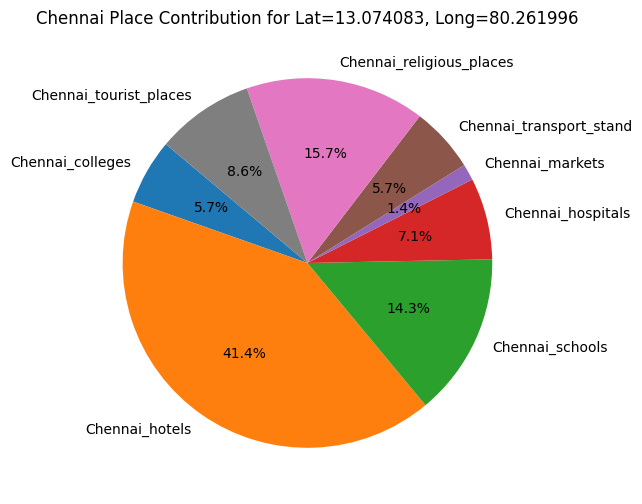

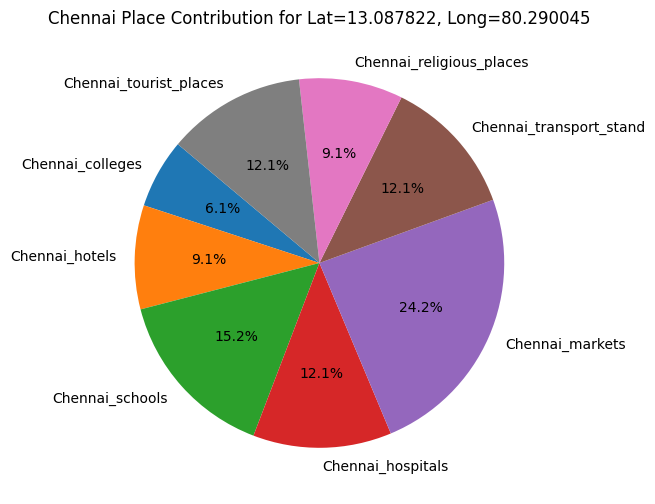

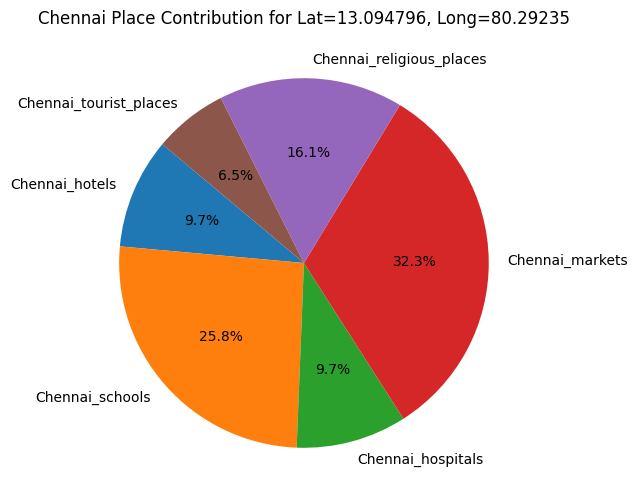

In [5]:
df = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\sunday seperated\sundayas_pcw.csv")
df = df.drop(["Alert", "Date", "Time", "Vehicle", "Speed", "Weekday"], axis=1)
grouped_df = df.groupby(["Lat", "Long"]).sum()
grouped_df["Total"] = grouped_df.sum(axis=1)
for index, row in grouped_df.iterrows():
    chennai_places = row[:-1]
    total = row["Total"]
    # Calculate percentages
    percentages = (chennai_places / total) * 100
    
    if any(percentages > 0):
        labels = chennai_places.index[percentages > 0]
        percentages = [percentage for percentage in percentages if percentage > 0]
        
        # Create a pie chart
        plt.figure(figsize=(6, 6))
        plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f"Chennai Place Contribution for Lat={index[0]}, Long={index[1]}")
        plt.show()


##  Compare data weekday on locations warning density using heatmap.

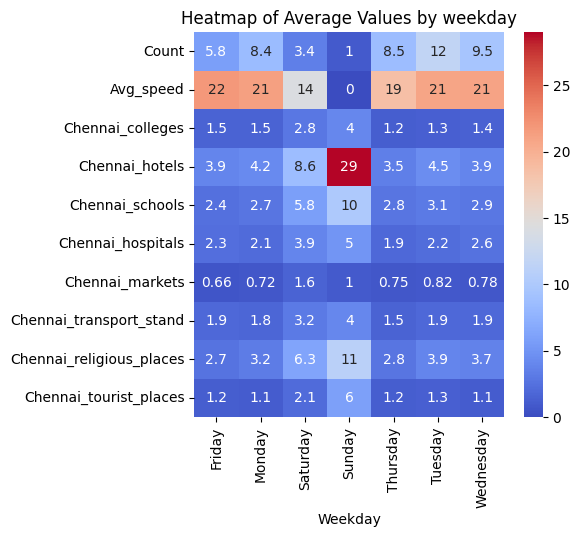

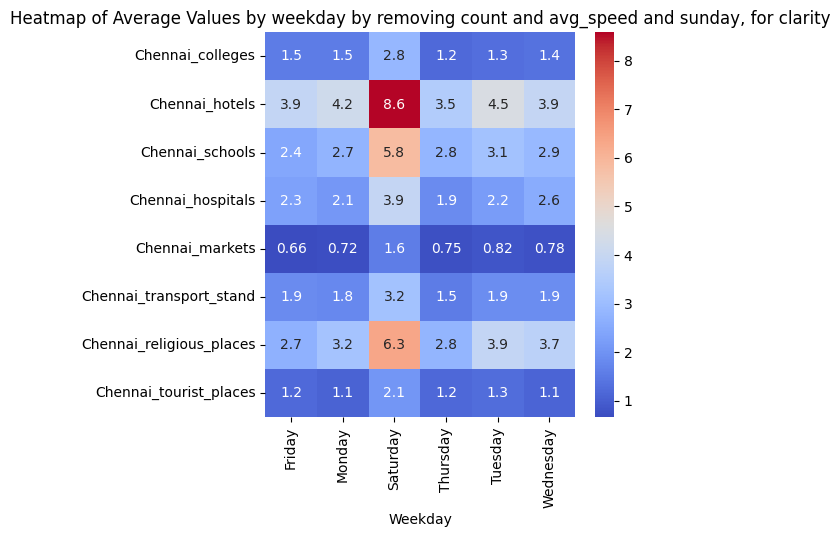

In [6]:

df = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\date basis\alert seperated data with concenteration of warning each weekday with chennai places\cas_pcw.csv")
df = df.drop(["Lat", "Long"], axis=1)
grouped_df = df.groupby('Weekday').mean()
grouped_df = grouped_df.T
plt.figure(figsize=(5,5))
sns.heatmap(grouped_df, annot=True, cmap="coolwarm")
plt.title("Heatmap of Average Values by weekday")
plt.show()

grouped_df = grouped_df.drop(["Count", "Avg_speed"], axis=0)
grouped_df = grouped_df.drop(["Sunday"], axis=1)
plt.figure(figsize=(5, 5))
sns.heatmap(grouped_df, annot=True, cmap="coolwarm")
plt.title("Heatmap of Average Values by weekday by removing count and avg_speed and sunday, for clarity")
plt.show()

## See contribution of places in each weekday. 

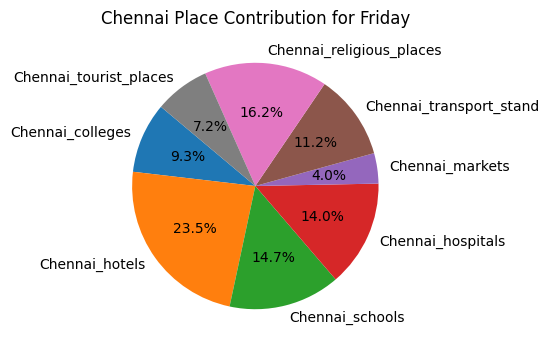

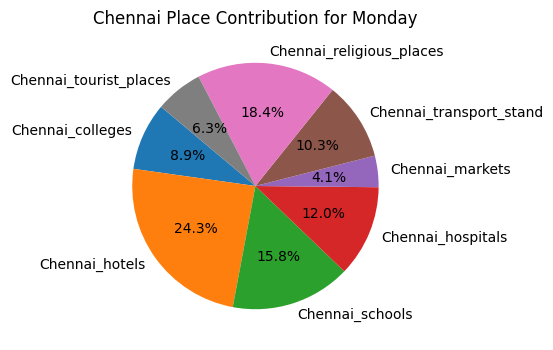

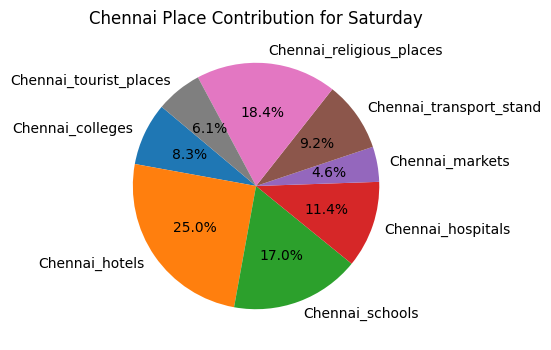

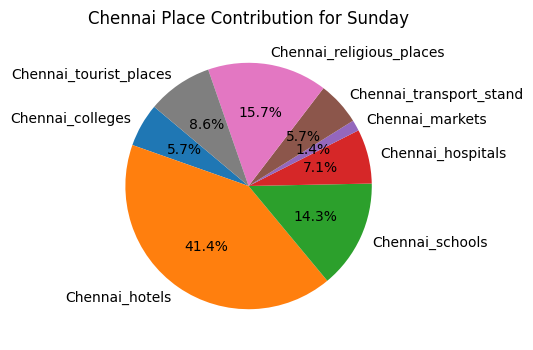

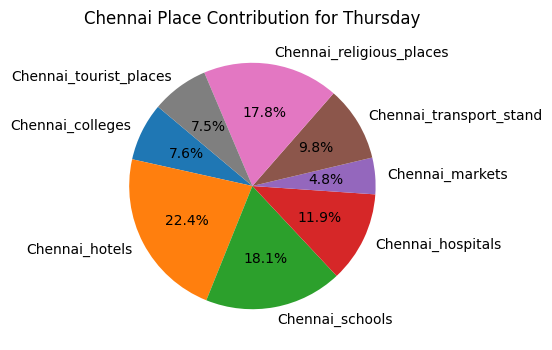

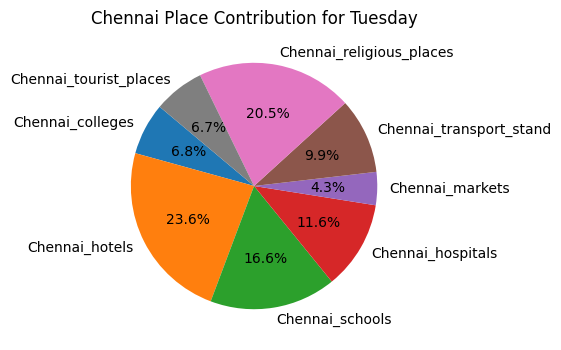

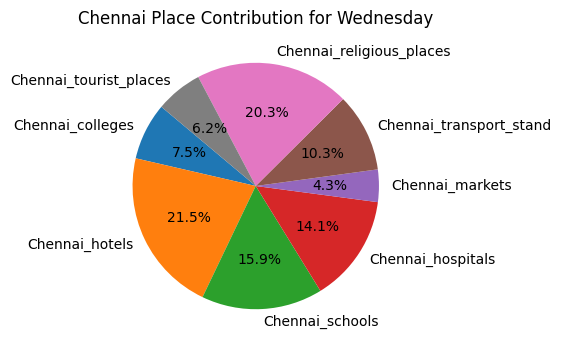

In [7]:
df = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\date basis\alert seperated data with concenteration of warning each weekday with chennai places\cas_pcw.csv")
df = df.drop(["Lat", "Long", "Count", "Avg_speed"], axis=1)
grouped_df = df.groupby('Weekday').sum()
grouped_df['Total'] = grouped_df.sum(axis=1)
for time_hour, row in grouped_df.iterrows():
    chennai_places = row[:-1]  
    total = row['Total']
    
    # Calculate percentages
    percentages = (chennai_places / total) * 100
    
    # Check if any percentage is greater than 0
    if any(percentages > 0):
        labels = [place for place, percentage in percentages.items() if percentage > 0]
        percentages = [percentage for percentage in percentages if percentage > 0]
        
        plt.figure(figsize=(4,4))
        plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f"Chennai Place Contribution for {time_hour}")
        plt.show()


Except sunday and saturday , alerts are constant , so by this we conclude everyday persons repete their same schedule, so thats why this thing comes out.

# Analyse speed data for this warning.

q1 =  9.0
mean_speed =  17.0
q3 =  25.0
No of alerts below q1 =  548
No of alerts >= q1 but < mean_speed  =  477
No of alerts >= mean_speed but < q3  =  502
No of alerts greater than q3 =  449
No of alerts above mean =  951
No of alerts below mean =  1025


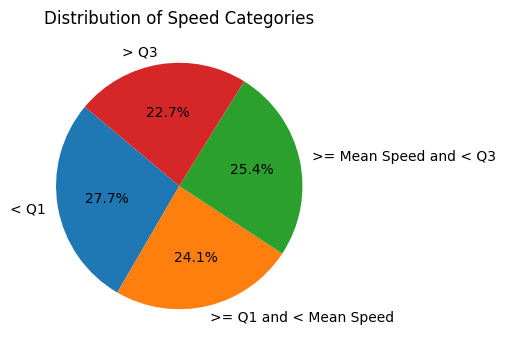

In [8]:
df=pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\Data seperated on alert\cas_pcw.csv")

mean_speed=np.median(df["Speed"])
q1=np.percentile(df["Speed"],25)
q3=np.percentile(df["Speed"],75)
print("q1 = ",q1)
print("mean_speed = ",mean_speed)
print("q3 = ",q3)
d1=df[df["Speed"]<=q1].shape
print("No of alerts below q1 = " ,d1[0])
d2=df[(df["Speed"]>q1) & (df["Speed"]<=mean_speed)].shape
print("No of alerts >= q1 but < mean_speed  = " ,d2[0])
d3=df[(df["Speed"]>mean_speed) & (df["Speed"]<=q3)].shape
print("No of alerts >= mean_speed but < q3  = " ,d3[0])
d4=df[df["Speed"]>q3].shape
print("No of alerts greater than q3 = " ,d4[0])
print("No of alerts above mean = ",(d3[0]+d4[0]))
print("No of alerts below mean = ",(d1[0]+d2[0]))


# Create a list of labels for the categories
categories = ["< Q1", ">= Q1 and < Mean Speed", ">= Mean Speed and < Q3", "> Q3"]

# Create a list of data points in each category
data = [d1[0], d2[0], d3[0], d4[0]]

plt.figure(figsize=(4,4))
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Speed Categories")
plt.show()


so here speed is very less in this area what are the condition of roads, cities are there and crowdy so mostly vehicle go slow ther.
approx 50 percent warnings below 17 speed this shows this alerts mostly come where are is crowded, narrow roads etc.  roads can we widden with pathway may leads to reduction of alerts.

## seperate data and see where speed is more and less.

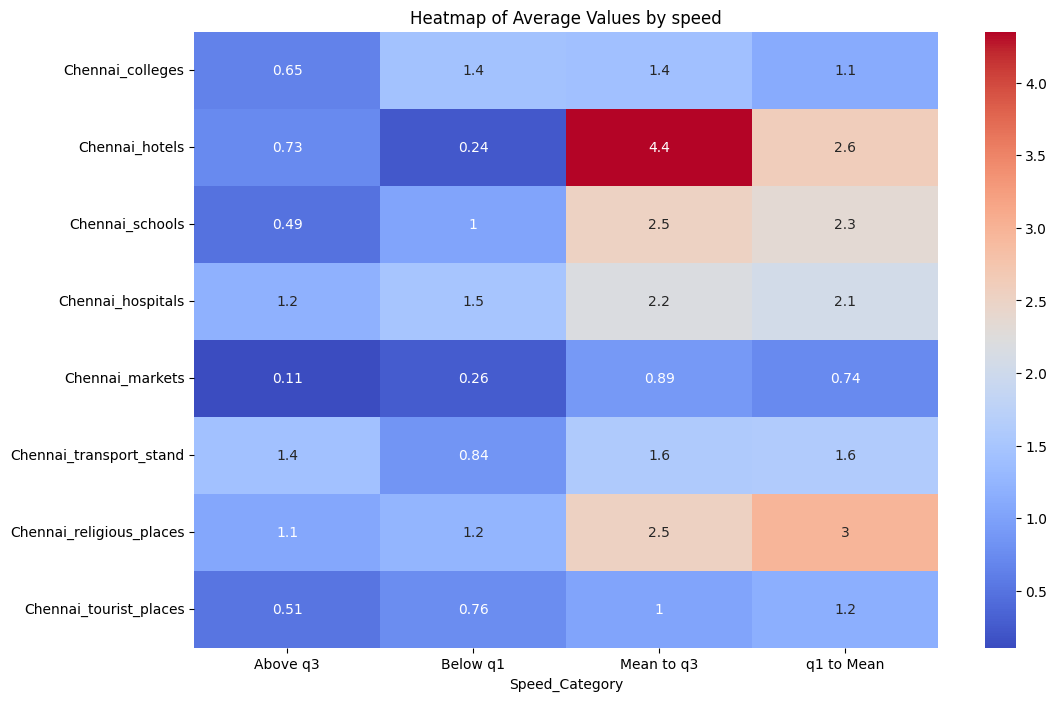

In [9]:
df1 = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\alert density basis\alert high density points with places count\cas_pcw.csv")
df1 = df1.drop(["Lat", "Long", "Count"], axis=1)
mean_speed = np.median(df1["Avg_speed"])
q1 = np.percentile(df1["Avg_speed"], 25)
q3 = np.percentile(df1["Avg_speed"], 75)
def speed_category(speed):
    if speed < q1:
        return "Below q1"
    elif speed >= q1 and speed <= mean_speed:
        return "q1 to Mean"
    elif speed >= mean_speed and speed <= q3:
        return "Mean to q3"
    else:
        return "Above q3"

df1['Speed_Category'] = df1['Avg_speed'].apply(speed_category)
grouped_df = df1.groupby('Speed_Category').mean()
grouped_df=grouped_df.drop(["Avg_speed"],axis=1)
grouped_df = grouped_df.T

plt.figure(figsize=(12, 8))
sns.heatmap(grouped_df, annot=True, cmap="coolwarm")
plt.title("Heatmap of Average Values by speed")
plt.show()

# Why most of time speed zero

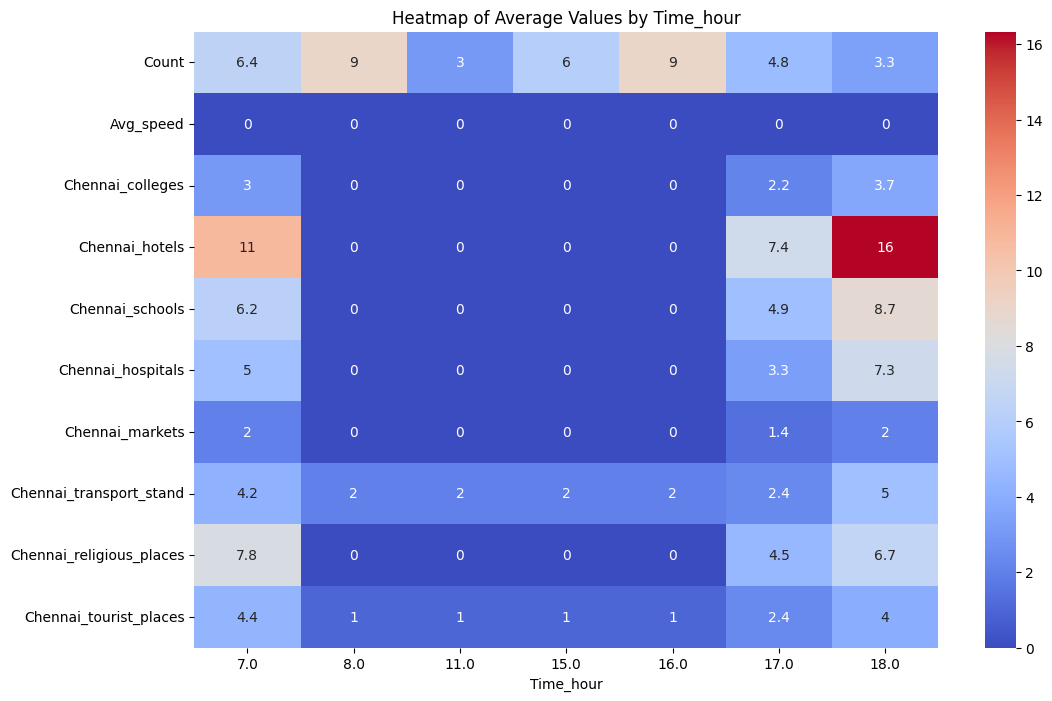

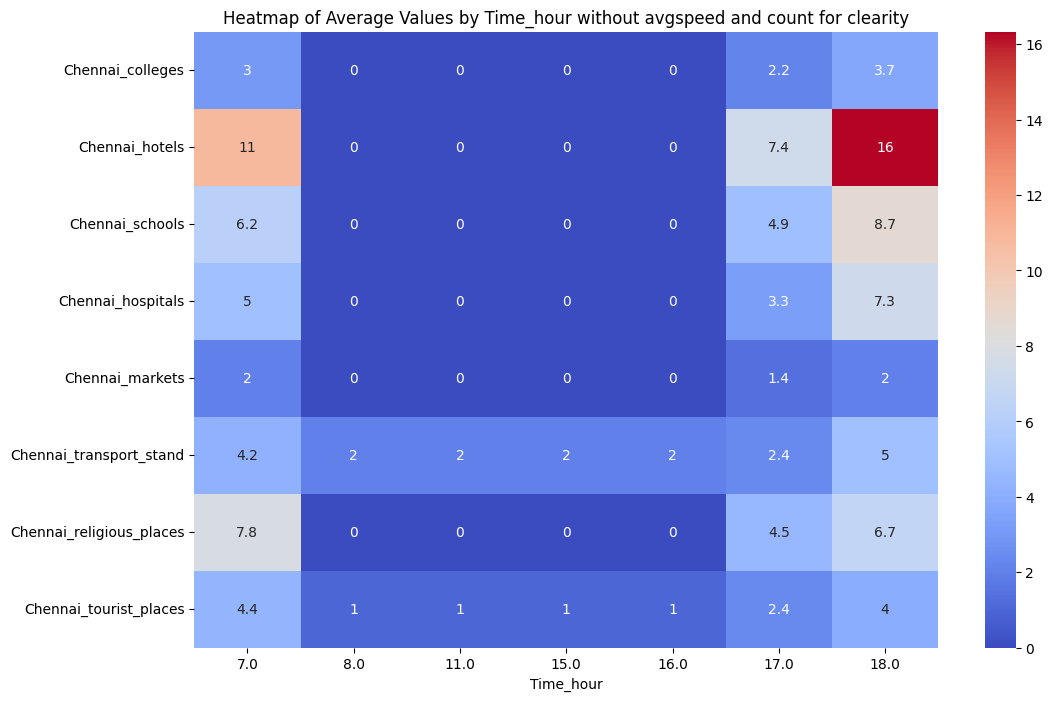

In [10]:

df = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\Place where speed is zero\zero speed alert seperated on warnings and hour basis with chennai data\pcw_zero_csvdata_conc_with_time.csv")
df = df.drop(["Lat", "Long"], axis=1)
grouped_df = df.groupby('Time_hour').mean()
grouped_df = grouped_df.T
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_df, annot=True, cmap="coolwarm")
plt.title("Heatmap of Average Values by Time_hour")
plt.show()
grouped_df = grouped_df.drop(["Count", "Avg_speed"], axis=0)
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(grouped_df, annot=True, cmap="coolwarm")

# Set the title
plt.title("Heatmap of Average Values by Time_hour without avgspeed and count for clearity")

# Show the plot
plt.show()


most of the time 0 speed warnings are from 8 a.m. to 17 p.m. , and its constant so it means buses are just constant on place and sometimes its on and off like that so some persons in front that,s why this warning is.